In [ ]:
%pylab inline
import psycopg2
from psycopg2.extras import RealDictCursor
import pandas as pd
import numpy as np
from matplotlib import pyplot
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegressionCV
from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.ensemble import RandomForestClassifier
from sklearn import linear_model, decomposition
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error, r2_score, f1_score, precision_score, recall_score, roc_curve, auc, accuracy_score
from sklearn import model_selection
from sklearn import tree

### 1.Read regime data & text classifier

In [ ]:
conn = psycopg2.connect(host="qc-aurora.coh4objazhte.us-east-1.rds.amazonaws.com", 
                        database='qcdb', user='Capstone_User', password="capstoneFall2019!", port="5432")
cur = conn.cursor(cursor_factory=RealDictCursor) 
cur.execute('SELECT * FROM text_data.classifier_hits_w_columnname limit 1000')
rows = cur.fetchall()
ch = pd.DataFrame(rows)

In [ ]:
# extract text classifier data by aggregrating by week
# first create year from date, and create week from date, then aggregrate by week
conn = psycopg2.connect(host="qc-aurora.coh4objazhte.us-east-1.rds.amazonaws.com", database='qcdb', user='Capstone_User', password="capstoneFall2019!", port="5432")
cur = conn.cursor(cursor_factory=RealDictCursor) 
cur.execute('''SELECT extract(year from date) as year,
extract(week from date) as Week,
sum(accounting_changes) as accounting_changes,
sum(accounting_red_flags) as accounting_red_flags,
sum(alternative_technology_development) as alternative_technology_development,
sum(assembly_bottleneck) as assembly_bottleneck,
sum(available_seat_km) as available_seat_km,
sum(bad_delivery_quality) as bad_delivery_quality,
sum(capacity_decrease) as capacity_decrease,
sum(capacity_increase) as capacity_increase,
sum(capacity_shortage) as capacity_shortage,
sum(capital_reinvestment) as capital_reinvestment,
sum(cash_flow_ltip_drivers) as cash_flow_ltip_drivers,
sum(co_market_interest_neg) as co_market_interest_neg,
sum(co_market_interest_pos) as co_market_interest_pos,
sum(competitive_environment) as competitive_environment,
sum(component_shortage) as component_shortage,
sum(contingency_planning) as contingency_planning,
sum(copper_price) as copper_price,
sum(copper_price_decrease) as copper_price_decrease,
sum(copper_price_increase) as copper_price_increase,
sum(corporate_governance) as corporate_governance,
sum(credit_profile) as credit_profile,
sum(crisis_management) as crisis_management,
sum(cyber_attack) as cyber_attack,
sum(debt_delinquency) as debt_delinquency,
sum(decreasing_competition) as decreasing_competition,
sum(demographic_strategy_change) as demographic_strategy_change,
sum(disruption_advantages) as disruption_advantages,
sum(earthquake) as earthquake,
sum(economy_neg_currency_weak) as economy_neg_currency_weak,
sum(economy_neg_economic_comparison) as economy_neg_economic_comparison,
sum(economy_neg_economy_turbulent) as economy_neg_economy_turbulent,
sum(economy_neg_economy_weak) as economy_neg_economy_weak,
sum(economy_neg_exchange_rate_bad) as economy_neg_exchange_rate_bad,
sum(economy_neg_exports_decrease) as economy_neg_exports_decrease,
sum(economy_neg_gdp_trend) as economy_neg_gdp_trend,
sum(economy_neg_inflation) as economy_neg_inflation,
sum(economy_neg_interest_rate_decrease) as economy_neg_interest_rate_decrease,
sum(economy_neg_interest_rate_increase) as economy_neg_interest_rate_increase,
sum(economy_neg_macroeconomic) as economy_neg_macroeconomic,
sum(economy_neg_shortage) as economy_neg_shortage,
sum(economy_neg_trade_relations_poor) as economy_neg_trade_relations_poor,
sum(economy_neg_unemployment_rate) as economy_neg_unemployment_rate,
sum(economy_neg_yield_curve_inverting) as economy_neg_yield_curve_inverting,
sum(economy_pos_currency_strong) as economy_pos_currency_strong,
sum(economy_pos_economic_comparison) as economy_pos_economic_comparison,
sum(economy_pos_economy_good) as economy_pos_economy_good,
sum(economy_pos_exchange_rate_good) as economy_pos_exchange_rate_good,
sum(economy_pos_exports_increase) as economy_pos_exports_increase,
sum(economy_pos_gdp_trend) as economy_pos_gdp_trend,
sum(economy_pos_imports_increase) as economy_pos_imports_increase,
sum(economy_pos_interest_rate_decrease) as economy_pos_interest_rate_decrease,
sum(economy_pos_interest_rate_increase) as economy_pos_interest_rate_increase,
sum(economy_pos_macroeconomic) as economy_pos_macroeconomic,
sum(economy_pos_plentiful) as economy_pos_plentiful,
sum(economy_pos_tax) as economy_pos_tax,
sum(economy_pos_trade_relations) as economy_pos_trade_relations,
sum(economy_pos_unemployment_rate) as economy_pos_unemployment_rate,
sum(economy_pos_yield_curve_steep) as economy_pos_yield_curve_steep,
sum(engagement_trend) as engagement_trend,
sum(epidemic) as epidemic,
sum(eps_ltip_drivers) as eps_ltip_drivers,
sum(equipment_failure) as equipment_failure,
sum(esg_ltip_drivers) as esg_ltip_drivers,
sum(facility_fire) as facility_fire,
sum(finance_neg_accounting_changes) as finance_neg_accounting_changes,
sum(finance_neg_accounting_error_restatements) as finance_neg_accounting_error_restatements,
sum(finance_neg_accounting_red_flags) as finance_neg_accounting_red_flags,
sum(finance_neg_balance_sheet_weak) as finance_neg_balance_sheet_weak,
sum(finance_neg_bankruptcy) as finance_neg_bankruptcy,
sum(finance_neg_debt_delinquency) as finance_neg_debt_delinquency,
sum(finance_neg_difficulty_increase) as finance_neg_difficulty_increase,
sum(finance_neg_efficiency_low) as finance_neg_efficiency_low,
sum(finance_neg_expense_mgmt) as finance_neg_expense_mgmt,
sum(finance_neg_finance_based_risks) as finance_neg_finance_based_risks,
sum(finance_neg_free_cash_flow) as finance_neg_free_cash_flow,
sum(finance_neg_liquidity) as finance_neg_liquidity,
sum(finance_neg_loss) as finance_neg_loss,
sum(finance_neg_low_productivity) as finance_neg_low_productivity,
sum(finance_neg_negative_signal) as finance_neg_negative_signal,
sum(finance_neg_performance_weak) as finance_neg_performance_weak,
sum(finance_neg_profit_decrease) as finance_neg_profit_decrease,
sum(finance_neg_revenue_down) as finance_neg_revenue_down,
sum(finance_neg_underperform) as finance_neg_underperform,
sum(finance_pos_confident_performance) as finance_pos_confident_performance,
sum(finance_pos_credit_profile_improve) as finance_pos_credit_profile_improve,
sum(finance_pos_earnings_forecast) as finance_pos_earnings_forecast,
sum(finance_pos_earnings_revision_upward) as finance_pos_earnings_revision_upward,
sum(finance_pos_efficiency_high) as finance_pos_efficiency_high,
sum(finance_pos_expense_mgmt) as finance_pos_expense_mgmt,
sum(finance_pos_free_cash_flow) as finance_pos_free_cash_flow,
sum(finance_pos_improve_outcome) as finance_pos_improve_outcome,
sum(finance_pos_liquidity) as finance_pos_liquidity,
sum(finance_pos_outperform) as finance_pos_outperform,
sum(finance_pos_performance_goals) as finance_pos_performance_goals,
sum(finance_pos_performance_strong) as finance_pos_performance_strong,
sum(finance_pos_profit_increase) as finance_pos_profit_increase,
sum(finance_pos_revenue_up) as finance_pos_revenue_up,
sum(finance_pos_sales_strong) as finance_pos_sales_strong,
sum(finance_pos_shareholder_value) as finance_pos_shareholder_value,
sum(floods) as floods,
sum(free_cash_flow) as free_cash_flow,
sum(general_ltip) as general_ltip,
sum(goal_to_increase_leverage) as goal_to_increase_leverage,
sum(goal_to_reduce_leverage) as goal_to_reduce_leverage,
sum(good_delivery_quality) as good_delivery_quality,
sum(government_dissatisfaction) as government_dissatisfaction,
sum(higher_prices_bool) as higher_prices_bool,
sum(imminent_industry_upturn) as imminent_industry_upturn,
sum(improve_credit_profile) as improve_credit_profile,
sum(increasing_competition) as increasing_competition,
sum(industrial_accident) as industrial_accident,
sum(industry_downturn) as industry_downturn,
sum(industry_neg_accident) as industry_neg_accident,
sum(industry_neg_commodity_shortage) as industry_neg_commodity_shortage,
sum(industry_neg_competition_increase) as industry_neg_competition_increase,
sum(industry_neg_crime_high) as industry_neg_crime_high,
sum(industry_neg_demand_unstable) as industry_neg_demand_unstable,
sum(industry_neg_demand_weak) as industry_neg_demand_weak,
sum(industry_neg_downgrade) as industry_neg_downgrade,
sum(industry_neg_earthquake) as industry_neg_earthquake,
sum(industry_neg_famine) as industry_neg_famine,
sum(industry_neg_floods) as industry_neg_floods,
sum(industry_neg_governance_risks) as industry_neg_governance_risks,
sum(industry_neg_government_reaction) as industry_neg_government_reaction,
sum(industry_neg_headwinds) as industry_neg_headwinds,
sum(industry_neg_interest_rate_decrease) as industry_neg_interest_rate_decrease,
sum(industry_neg_interest_rate_increase) as industry_neg_interest_rate_increase,
sum(industry_neg_margin_larger) as industry_neg_margin_larger,
sum(industry_neg_market_based_risks) as industry_neg_market_based_risks,
sum(industry_neg_market_share_decline) as industry_neg_market_share_decline,
sum(industry_neg_momentum_negative) as industry_neg_momentum_negative,
sum(industry_neg_patent_expiration) as industry_neg_patent_expiration,
sum(industry_neg_political_change) as industry_neg_political_change,
sum(industry_neg_price_decrease) as industry_neg_price_decrease,
sum(industry_neg_price_increase) as industry_neg_price_increase,
sum(industry_neg_product_obsolescence) as industry_neg_product_obsolescence,
sum(industry_neg_regulatory_risks) as industry_neg_regulatory_risks,
sum(industry_neg_socio_political_risks) as industry_neg_socio_political_risks,
sum(industry_neg_supply_decrease) as industry_neg_supply_decrease,
sum(industry_neg_technology_risks) as industry_neg_technology_risks,
sum(industry_neg_terrorism) as industry_neg_terrorism,
sum(industry_neg_trade_restrictions) as industry_neg_trade_restrictions,
sum(industry_neg_trade_war) as industry_neg_trade_war,
sum(industry_neg_unemployment_rate_bad) as industry_neg_unemployment_rate_bad,
sum(industry_pos_commodity_surplus) as industry_pos_commodity_surplus,
sum(industry_pos_competition_decrease) as industry_pos_competition_decrease,
sum(industry_pos_crime_low) as industry_pos_crime_low,
sum(industry_pos_demand_stabilization) as industry_pos_demand_stabilization,
sum(industry_pos_demand_strong) as industry_pos_demand_strong,
sum(industry_pos_general) as industry_pos_general,
sum(industry_pos_government_reaction) as industry_pos_government_reaction,
sum(industry_pos_interest_rate_decrease) as industry_pos_interest_rate_decrease,
sum(industry_pos_interest_rate_increase) as industry_pos_interest_rate_increase,
sum(industry_pos_margin_smaller) as industry_pos_margin_smaller,
sum(industry_pos_market_share_growth) as industry_pos_market_share_growth,
sum(industry_pos_market_share_stable) as industry_pos_market_share_stable,
sum(industry_pos_momentum) as industry_pos_momentum,
sum(industry_pos_patent_creation) as industry_pos_patent_creation,
sum(industry_pos_political_change) as industry_pos_political_change,
sum(industry_pos_price_decrease) as industry_pos_price_decrease,
sum(industry_pos_price_increase) as industry_pos_price_increase,
sum(industry_pos_prices_steady) as industry_pos_prices_steady,
sum(industry_pos_products_better) as industry_pos_products_better,
sum(industry_pos_supply_increase) as industry_pos_supply_increase,
sum(industry_pos_tailwinds) as industry_pos_tailwinds,
sum(industry_pos_technological_cooperation) as industry_pos_technological_cooperation,
sum(industry_pos_unemployment_rate_good) as industry_pos_unemployment_rate_good,
sum(industry_specific_ltip_drivers) as industry_specific_ltip_drivers,
sum(information_leak) as information_leak,
sum(insider_holdings) as insider_holdings,
sum(labor_union_strike) as labor_union_strike,
sum(lead_time_reduction) as lead_time_reduction,
sum(leverage_goals) as leverage_goals,
sum(long_term_strong_strategy) as long_term_strong_strategy,
sum(long_term_weak_strategy) as long_term_weak_strategy,
sum(lower_prices_bool) as lower_prices_bool,
sum(management) as management,
sum(management_aggressiveness) as management_aggressiveness,
sum(management_buzz_growth) as management_buzz_growth,
sum(management_buzz_kpi) as management_buzz_kpi,
sum(management_buzz_opportunity) as management_buzz_opportunity,
sum(management_buzz_stability) as management_buzz_stability,
sum(management_buzz_strategy) as management_buzz_strategy,
sum(management_defensiveness) as management_defensiveness,
sum(management_demographic_strategy) as management_demographic_strategy,
sum(management_growth_buzz) as management_growth_buzz,
sum(management_guidance_unchanged) as management_guidance_unchanged,
sum(management_kpi_buzz) as management_kpi_buzz,
sum(management_neg_ceo_change) as management_neg_ceo_change,
sum(management_neg_conflict_of_interest) as management_neg_conflict_of_interest,
sum(management_neg_cyber_attack) as management_neg_cyber_attack,
sum(management_neg_divestitures) as management_neg_divestitures,
sum(management_neg_fraud) as management_neg_fraud,
sum(management_neg_guidance) as management_neg_guidance,
sum(management_neg_information_leak) as management_neg_information_leak,
sum(management_neg_longterm_strategy) as management_neg_longterm_strategy,
sum(management_neg_media_leak) as management_neg_media_leak,
sum(management_neg_mgmt_change) as management_neg_mgmt_change,
sum(management_neg_mgmt_price_shilling) as management_neg_mgmt_price_shilling,
sum(management_neg_mgmt_risks) as management_neg_mgmt_risks,
sum(management_neg_mgmt_sentiment) as management_neg_mgmt_sentiment,
sum(management_neg_new_share_issuance) as management_neg_new_share_issuance,
sum(management_neg_patent_disputes) as management_neg_patent_disputes,
sum(management_neg_research_restrictions) as management_neg_research_restrictions,
sum(management_neg_shortterm_strategy) as management_neg_shortterm_strategy,
sum(management_opportunity_buzz) as management_opportunity_buzz,
sum(management_pos_ceo_change) as management_pos_ceo_change,
sum(management_pos_cfo_change) as management_pos_cfo_change,
sum(management_pos_corporate_culture) as management_pos_corporate_culture,
sum(management_pos_guidance) as management_pos_guidance,
sum(management_pos_hedging_risk) as management_pos_hedging_risk,
sum(management_pos_longterm_strategy) as management_pos_longterm_strategy,
sum(management_pos_marketing_strategy) as management_pos_marketing_strategy,
sum(management_pos_mergers_acquisitions) as management_pos_mergers_acquisitions,
sum(management_pos_met_goals) as management_pos_met_goals,
sum(management_pos_mgmt_change) as management_pos_mgmt_change,
sum(management_pos_mgmt_sentiment) as management_pos_mgmt_sentiment,
sum(management_pos_research_development) as management_pos_research_development,
sum(management_pos_shortterm_strategy) as management_pos_shortterm_strategy,
sum(management_price_shilling) as management_price_shilling,
sum(management_regional_strategy) as management_regional_strategy,
sum(management_stability_buzz) as management_stability_buzz,
sum(management_strategy_buzz) as management_strategy_buzz,
sum(market_responsive_inventory_strategy) as market_responsive_inventory_strategy,
sum(market_responsive_supply_chain_goal) as market_responsive_supply_chain_goal,
sum(marketing_strategy_change) as marketing_strategy_change,
sum(monitoring_leading_indicators) as monitoring_leading_indicators,
sum(negative_government_reaction) as negative_government_reaction,
sum(negative_political_change) as negative_political_change,
sum(operating_income_ltip_drivers) as operating_income_ltip_drivers,
sum(operations_neg_assembly_bottleneck) as operations_neg_assembly_bottleneck,
sum(operations_neg_capacity_decrease) as operations_neg_capacity_decrease,
sum(operations_neg_capacity_shortage) as operations_neg_capacity_shortage,
sum(operations_neg_component_shortage) as operations_neg_component_shortage,
sum(operations_neg_delivery_quality) as operations_neg_delivery_quality,
sum(operations_neg_equipment_failure) as operations_neg_equipment_failure,
sum(operations_neg_industry_satisfaction) as operations_neg_industry_satisfaction,
sum(operations_neg_low_consumer_demand) as operations_neg_low_consumer_demand,
sum(operations_neg_plant_closure) as operations_neg_plant_closure,
sum(operations_neg_power_outage) as operations_neg_power_outage,
sum(operations_neg_product_failure) as operations_neg_product_failure,
sum(operations_neg_product_recall) as operations_neg_product_recall,
sum(operations_neg_product_satisfaction) as operations_neg_product_satisfaction,
sum(operations_neg_production_freeze) as operations_neg_production_freeze,
sum(operations_neg_stock_warehouse_concerns) as operations_neg_stock_warehouse_concerns,
sum(operations_neg_transportation_disruption) as operations_neg_transportation_disruption,
sum(operations_neg_union_strike) as operations_neg_union_strike,
sum(operations_neg_work_stoppage) as operations_neg_work_stoppage,
sum(operations_pos_alt_tech_dev) as operations_pos_alt_tech_dev,
sum(operations_pos_capacity_increase) as operations_pos_capacity_increase,
sum(operations_pos_consumer_demand) as operations_pos_consumer_demand,
sum(operations_pos_contingency_planning) as operations_pos_contingency_planning,
sum(operations_pos_crisis_management) as operations_pos_crisis_management,
sum(operations_pos_delivery_quality) as operations_pos_delivery_quality,
sum(operations_pos_disruption_advantages) as operations_pos_disruption_advantages,
sum(operations_pos_efficiency) as operations_pos_efficiency,
sum(operations_pos_industry_satisfaction) as operations_pos_industry_satisfaction,
sum(operations_pos_lead_time_reduction) as operations_pos_lead_time_reduction,
sum(operations_pos_market_responsive_goal) as operations_pos_market_responsive_goal,
sum(operations_pos_market_responsive_inv_strategy) as operations_pos_market_responsive_inv_strategy,
sum(operations_pos_monitor_leading_indicators) as operations_pos_monitor_leading_indicators,
sum(operations_pos_opportunity_recognition) as operations_pos_opportunity_recognition,
sum(operations_pos_orders_increase) as operations_pos_orders_increase,
sum(operations_pos_organic_growth) as operations_pos_organic_growth,
sum(operations_pos_plant_opening) as operations_pos_plant_opening,
sum(operations_pos_process_efficient_goal) as operations_pos_process_efficient_goal,
sum(operations_pos_process_effiicent_inv_strategy) as operations_pos_process_effiicent_inv_strategy,
sum(operations_pos_product_innovation) as operations_pos_product_innovation,
sum(operations_pos_product_satisfaction) as operations_pos_product_satisfaction,
sum(operations_pos_resource_mobilization) as operations_pos_resource_mobilization,
sum(operations_pos_third_party_recognition) as operations_pos_third_party_recognition,
sum(opportunity_recognition) as opportunity_recognition,
sum(passenger_load_factor_decrease) as passenger_load_factor_decrease,
sum(passenger_load_factor_increase) as passenger_load_factor_increase,
sum(patent_disputes) as patent_disputes,
sum(plant_closure) as plant_closure,
sum(plant_opening) as plant_opening,
sum(positive_government_reaction) as positive_government_reaction,
sum(positive_political_change) as positive_political_change,
sum(power_outage) as power_outage,
sum(price_decreases) as price_decreases,
sum(price_increases) as price_increases,
sum(process_efficient_inventory_strategy) as process_efficient_inventory_strategy,
sum(process_efficient_supply_chain_goal) as process_efficient_supply_chain_goal,
sum(product_cycle) as product_cycle,
sum(product_failure) as product_failure,
sum(product_obsolescence) as product_obsolescence,
sum(product_recall) as product_recall,
sum(production_freeze) as production_freeze,
sum(research_restrictions) as research_restrictions,
sum(resource_mobilization) as resource_mobilization,
sum(revenue_ltip_drivers) as revenue_ltip_drivers,
sum(short_term_strong_strategy) as short_term_strong_strategy,
sum(short_term_weak_strategy) as short_term_weak_strategy,
sum(strong_demand_bool) as strong_demand_bool,
sum(strong_economy) as strong_economy,
sum(strong_strategy_bool) as strong_strategy_bool,
sum(supply_decrease) as supply_decrease,
sum(supply_increase) as supply_increase,
sum(tech_pos_new_tech_copy) as tech_pos_new_tech_copy,
sum(transportation_disruption) as transportation_disruption,
sum(tsr_ltip_drivers) as tsr_ltip_drivers,
sum(unstable_demand) as unstable_demand,
sum(weak_demand_bool) as weak_demand_bool,
sum(weak_strategy_bool) as weak_strategy_bool,
sum(work_stoppage) as work_stoppage,
sum(yield_curve) as yield_curve,
sum(yield_curve_flattening) as yield_curve_flattening,
sum(yield_curve_steepening) as yield_curve_steepening
FROM text_data.classifier_hits_w_columnname
GROUP BY extract(week from date), extract(year from date) 
ORDER BY extract(year from date),extract(week from date)''')
rows = cur.fetchall()
features = pd.DataFrame(rows)

In [ ]:
# read regime data
conn = psycopg2.connect(host="qc-aurora.coh4objazhte.us-east-1.rds.amazonaws.com", 
                        database='qcdb', user='Capstone_User', password="capstoneFall2019!", port="5432")
cur1 = conn.cursor(cursor_factory=RealDictCursor) 
cur1.execute('SELECT extract(year from cast(date as date)) as year, extract(week from cast(date as date)) as week,mkt_ret_regimes,three_factor_regimes FROM text_data.regime') 
rows = cur1.fetchall()
regime = pd.DataFrame(rows)
regime

In [ ]:
# join two tables
data = regime.merge(features, how = 'inner', on = ['year','week'])

In [ ]:
data.head()

In [ ]:
#This step is optional: save the data file to local path
data.to_csv("/Users/cc/Desktop/19Fall Semester/BUDT758W-Capstone Project/data.csv")

In [57]:
# After year 2003, week 3 we can have consecutive data
# Because we want to use week 1's features to predict week 4's regime, we drop the un-continuous data
# the index of year 2003, week 3 is 14, so we want data after index 14
data=data.iloc[14:,:] 

In [58]:
data.head()

,mkt_ret_regimes,three_factor_regimes,week,year,accounting_changes,accounting_red_flags,alternative_technology_development,assembly_bottleneck,available_seat_km,bad_delivery_quality,...,tech_pos_new_tech_copy,transportation_disruption,tsr_ltip_drivers,unstable_demand,weak_demand_bool,weak_strategy_bool,work_stoppage,yield_curve,yield_curve_flattening,yield_curve_steepening
0,1,2,3.0,2003.0,0,76,76,0,0,0,...,1004,36,0,248,2176,160,0,100,44,24
1,1,2,4.0,2003.0,12,160,52,40,0,4,...,1400,8,28,1140,5512,448,68,32,12,0
2,1,2,5.0,2003.0,0,0,116,168,0,0,...,2352,4,0,696,6784,384,52,232,0,0
3,1,2,6.0,2003.0,0,16,88,112,0,0,...,892,24,0,612,4856,160,64,64,0,0
4,1,2,7.0,2003.0,44,72,12,52,0,0,...,1584,16,0,288,3616,104,28,0,0,0


In [59]:
data['mkt_ret_regimes'].describe()

count    789.000000
mean       0.283904
std        0.451177
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: mkt_ret_regimes, dtype: float64

In [60]:
data['three_factor_regimes'].describe()

count    789.000000
mean       1.207858
std        0.614866
min        0.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        2.000000
Name: three_factor_regimes, dtype: float64

### 2. Prepare the dataset, train test split, create a 3 week lag

In [61]:
# the first two columns are y variables, the rest of the columns are predictors
X=data.iloc[:,2:]
# y_two means two factor regime, y_three means 3 factor regime
y_two,y_three=data['mkt_ret_regimes'],data['three_factor_regimes']


## we take 3 weeks lag, so we drop the last 3 x variabels
X=X.iloc[0:-3,2:]
X=X.reset_index().iloc[:,1:]

## take 3 weeks lag, the response y is 3 weeks later than predictor.
## for example, using week1's text features to predict week4's regime.
y_two=y_two[3:]

# train test split, test size: 0.35, ramdom state = 123
from sklearn.model_selection import train_test_split
X_train,X_test,y_two_train,y_two_test=train_test_split(X,y_two,test_size = 0.35, random_state=123)

### 3. Using the original dataset to run models

###  3-1. Logistic Regression

In [81]:
# using training data to train logistic regression
logreg_twolag = LogisticRegression()
logreg_twolag.fit(X_train,y_two_train)#generate the model

# use the trained model predict on test data
lr_y_pred = logreg_twolag.predict(X_test)

#calculate accuracy score
from sklearn.metrics import accuracy_score
accuracy_score(y_two_test,lr_y_pred)

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.7717391304347826

In [82]:
# calculate baseline: the majority class
y_two_test.value_counts()[0]/len(y_two_test)
print('baseline accuracy is: '+ str(y_two_test.value_counts()[0]/len(y_two_test)));

#calcualte confusion matrixs
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
print('precision score is: '+str(precision_score(y_two_test,lr_y_pred)))
print('recall score is: '+str(recall_score(y_two_test,lr_y_pred)))
print('f1 score is: '+str(f1_score(y_two_test,lr_y_pred)))

#auroc
ns_probs = [1 if np.average(y_two_test)>=0.5 else 0 for _ in range(len(y_two_test))]#common class

ns_auc = roc_auc_score(y_two_test,ns_probs)
lr_auc = roc_auc_score(y_two_test,lr_y_pred)
# summarize scores
print('Baseline: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))

baseline accuracy is: 0.6884057971014492
precision score is: 0.632183908045977
recall score is: 0.6395348837209303
f1 score is: 0.6358381502890174
Baseline: ROC AUC=0.500
Logistic: ROC AUC=0.736


### 3-2. Lasso Logistic Regression

In [64]:
# when the penalty is L1, it's LASSO logistic regression
# we use cross validation to pick the best regularization strength C
from sklearn.linear_model import LogisticRegressionCV
lasso_lr = LogisticRegressionCV(penalty="l1",cv=5,solver='liblinear',random_state=0)
lasso_lr.fit(X_train,y_two_train)
thetaLasso=lasso_lr.coef_

In [65]:
#the best C picked by cross validation
lasso_lr.C_

array([0.00077426])

In [66]:
# Show the features that are not eliminated (coefficients not equal to 0)
lassoCoef=thetaLasso.tolist()[0]
lassoCoef_dic={X_train.columns[i]:v for i,v in enumerate(lassoCoef)}

lassoCoef_DF=pd.DataFrame.from_dict(list(lassoCoef_dic.items()))
lassoCoef_DF.columns=['Feature','Coef']
lassoCoef_DF=lassoCoef_DF.loc[lassoCoef_DF['Coef']!=0,:]
lassoCoef_DF.sort_values(by= ['Coef'], ascending = False)

,Feature,Coef
78,finance_neg_negative_signal,0.003237
116,industry_neg_demand_unstable,0.003162
27,earthquake,0.003054
302,unstable_demand,0.001947
95,finance_pos_profit_increase,0.000748
280,price_decreases,0.000535
76,finance_neg_loss,0.000414
68,finance_neg_bankruptcy,0.000295
96,finance_pos_revenue_up,0.000171
281,price_increases,0.000148


In [84]:
# predict on testing data
lasso_y_pred = lasso_lr.predict(X_test)

from sklearn.metrics import accuracy_score
accuracy_score(y_two_test,lasso_y_pred)

0.7717391304347826

In [91]:
#baseline
y_two_test.value_counts()[0]/len(y_two_test)
print('baseline accuracy is: '+ str(y_two_test.value_counts()[0]/len(y_two_test)));

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
print('precision score is: '+str(precision_score(y_two_test,lasso_y_pred)))
print('recall score is: '+str(recall_score(y_two_test,lasso_y_pred)))
print('f1 score is: '+str(f1_score(y_two_test,lasso_y_pred)))

#auroc
import numpy as np
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

lasso_auc = roc_auc_score(y_two_test,lasso_y_pred)
# summarize scores
print('Baseline: ROC AUC=%.3f' % (ns_auc))
print('Lasso: ROC AUC=%.3f' % (lasso_auc))

baseline accuracy is: 0.6884057971014492
precision score is: 0.6949152542372882
recall score is: 0.47674418604651164
f1 score is: 0.5655172413793104
Baseline: ROC AUC=0.500
Lasso: ROC AUC=0.691


### 3-3. Classification Three 

In [69]:
from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

# using cross validation to tune tree parameters
param_dist = {"max_depth": np.linspace(1,50,50),
             "max_features": np.arange(1,X_train.shape[1]),
             "min_samples_leaf": np.linspace(0.1,0.5,20),
             "criterion": ["gini", "entropy"]}
tree = DecisionTreeClassifier()
tree_cv = RandomizedSearchCV(tree, param_dist, cv=5)
tree_cv.fit(X_train,y_two_train) 
tree_y_pred=tree_cv.best_estimator_.predict(X_test)

#tree_cv.score(X_test,y_two_test)

from sklearn.metrics import accuracy_score
accuracy_score(y_two_test,tree_y_pred)

0.7681159420289855

In [92]:
#baseline
y_two_test.value_counts()[0]/len(y_two_test)
print('baseline accuracy is: '+ str(y_two_test.value_counts()[0]/len(y_two_test)));

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
print('precision score is: '+str(precision_score(y_two_test,tree_y_pred)))
print('recall score is: '+str(recall_score(y_two_test,tree_y_pred)))
print('f1 score is: '+str(f1_score(y_two_test,tree_y_pred)))

#auroc
import numpy as np
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

ns_probs = [1 if np.average(y_two_test)>=0.5 else 0 for _ in range(len(y_two_test))]#common class

ns_auc = roc_auc_score(y_two_test,ns_probs)
tree_auc = roc_auc_score(y_two_test,tree_y_pred)
# summarize scores
print('Baseline: ROC AUC=%.3f' % (ns_auc))
print('Classification Tree: ROC AUC=%.3f' % (tree_auc))

baseline accuracy is: 0.6884057971014492
precision score is: 0.6964285714285714
recall score is: 0.45348837209302323
f1 score is: 0.5492957746478874
Baseline: ROC AUC=0.500
Classification Tree: ROC AUC=0.682


In [71]:
#tree's feature importance
import pandas as pd
# see how much they improve the impurity
importances = tree_cv.best_estimator_.feature_importances_
dic={X.columns[i]:v for i,v in enumerate(importances) if v!=0}
df=pd.DataFrame.from_dict(list(dic.items()))
df.columns=['Feature','Importance']
df=df.sort_values(by='Importance',ascending=False)
df=df.reset_index().iloc[:,1:]
df

,Feature,Importance
0,economy_neg_economic_comparison,0.495512
1,industry_pos_general,0.351722
2,management_pos_marketing_strategy,0.104081
3,finance_neg_efficiency_low,0.041397
4,management_pos_research_development,0.007289


In [72]:
#compare among two model's important features
[x for x in lassoCoef_DF['Feature'] if x in df['Feature']]

[]

In [73]:
from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

L=[]
for i in range(100):
    param_dist = {"max_depth": [1, 50],
                  "max_features": np.arange(1,310),
                  "min_samples_leaf": np.arange(1,50),
                  "criterion": ["gini", "entropy"]}
    tree = DecisionTreeClassifier()
    tree_cv = RandomizedSearchCV(tree, param_dist, cv=5)
    tree_cv.fit(X_train,y_two_train) 
    y_pred=tree_cv.best_estimator_.predict(X_test)

    #tree_cv.score(X_test,y_two_test)

    from sklearn.metrics import accuracy_score
    L.append(accuracy_score(y_two_test,y_pred))
print(np.average(L))

0.7568478260869566


In [1]:
# the best paramter chose via cross validation
tree_cv.best_estimator_

NameError: name 'tree_cv' is not defined

### 3-4. Random Forest

In [89]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the param_dist
param_dist = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier() 
rf_cv = RandomizedSearchCV(rf, param_dist, cv=5)
rf_cv.fit(X_train,y_two_train) 
rf_y_pred=rf_cv.best_estimator_.predict(X_test)


from sklearn.metrics import accuracy_score
accuracy_score(y_two_test,rf_y_pred)

0.8079710144927537

In [93]:
#baseline
y_two_test.value_counts()[0]/len(y_two_test)
print('baseline accuracy is: '+ str(y_two_test.value_counts()[0]/len(y_two_test)));

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
print('precision score is: '+str(precision_score(y_two_test,rf_y_pred)))
print('recall score is: '+str(recall_score(y_two_test,rf_y_pred)))
print('f1 score is: '+str(f1_score(y_two_test,rf_y_pred)))

#auroc
import numpy as np
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

ns_probs = [1 if np.average(y_two_test)>=0.5 else 0 for _ in range(len(y_two_test))]#common class

ns_auc = roc_auc_score(y_two_test,ns_probs)
rf_auc = roc_auc_score(y_two_test,rf_y_pred)
# summarize scores
print('Baseline: ROC AUC=%.3f' % (ns_auc))
print('Random Forest: ROC AUC=%.3f' % (rf_auc))

baseline accuracy is: 0.6884057971014492
precision score is: 0.9024390243902439
recall score is: 0.43023255813953487
f1 score is: 0.5826771653543307
Baseline: ROC AUC=0.500
Random Forest: ROC AUC=0.705


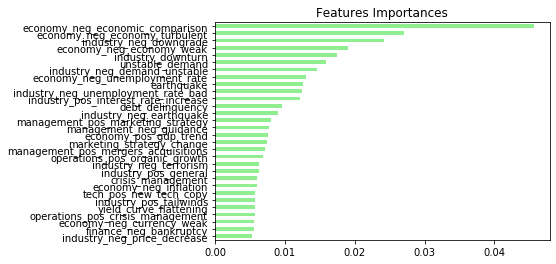

In [94]:
# check important festures based on how much impurity they improved
import matplotlib.pyplot as plt
importances = pd.Series(data=rf_cv.best_estimator_.feature_importances_,index= X_train.columns)
importances_sorted = importances.sort_values()[-30:]
importances_sorted.plot(kind='barh', color='lightgreen')
plt.title('Features Importances')
plt.show()

In [115]:
#compare among two model's important features
a = [x for x in lassoCoef_DF['Feature'] if x in importances_sorted]

In [118]:
## common important features based on lasso lr, classfication tree and random forest
for i in a:
    print(i)

earthquake
finance_neg_bankruptcy
industry_neg_demand_unstable
management_pos_mergers_acquisitions
unstable_demand


#### ROC Curves of all above models

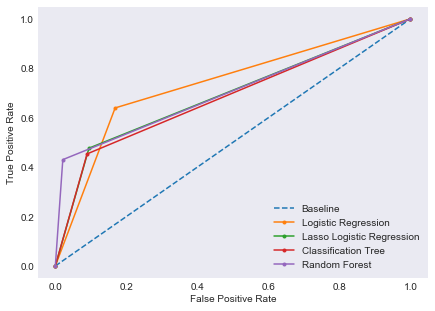

In [114]:
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_two_test,ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_two_test,lr_y_pred)
lasso_fpr, lasso_tpr, _ = roc_curve(y_two_test,lasso_y_pred)
tree_fpr, tree_tpr, _ = roc_curve(y_two_test,tree_y_pred)
rf_fpr, rf_tpr, _ = roc_curve(y_two_test,rf_y_pred)
# plot the roc curve for the model
pyplot.figure(figsize=(7,5));
pyplot.style.use('seaborn-dark')
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Baseline')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic Regression')
pyplot.plot(lasso_fpr, lasso_tpr, marker='.', label='Lasso Logistic Regression')
pyplot.plot(tree_fpr, tree_tpr, marker='.', label='Classification Tree')
pyplot.plot(rf_fpr, rf_tpr, marker='.', label='Random Forest')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend(loc='lower right')
# show the plot
pyplot.show();

### 4. Trying PCA to reduce dimension and run the same models above

In [ ]:
#Perform PCA
pca = PCA()
X_reduced = pca.fit_transform(scale(X))

In [ ]:
#cv with 10 fold
n = len(X_reduced)
kf_10 = model_selection.KFold(n_splits=10, shuffle=False)

regr = LogisticRegression()
mse = []

In [ ]:
# Calculate MSE with only the intercept (no principal components in regression)
score = -1*model_selection.cross_val_score(regr, np.ones((n,1)), y.ravel(), cv=kf_10, scoring='neg_mean_squared_error').mean()    
mse.append(score)
# Calculate MSE using CV for the 200 principle components, adding one component at the time.
for i in np.arange(1, 200):
    score = -1*model_selection.cross_val_score(regr, X_reduced[:,:i], y.ravel(), cv=kf_10, scoring='neg_mean_squared_error').mean()
    mse.append(score)

In [ ]:
# Plot results
plt.figure(figsize=(25,10))
plt.plot(mse, '-v')
plt.xlabel('Number of principal components in regression')
plt.ylabel('MSE')
plt.title('Regime')
plt.xlim(xmin=-1);

In [ ]:
var = np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
var.shape

In [ ]:
var

### PCA Logistic Regression

#### Random Partition

In [ ]:
pca1 = PCA()
# Define X,y Split train/test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, shuffle=True, random_state = 123)

baseline = max(y_test[y_test==0].shape[0], y_test[y_test==1].shape[0])/y_test.shape[0]
baseline

In [ ]:
# Scale the data
X_reduced_train = pca1.fit_transform(scale(X_train))
n = len(X_reduced_train)

# 10-fold CV
kf_10 = model_selection.KFold( n_splits=10, shuffle=True, random_state=1)

regr = LogisticRegression()
mse = []

# Calculate MSE with only the intercept (no principal components in regression)
score = -1*model_selection.cross_val_score(regr, np.ones((n,1)), y_train.ravel(), cv=kf_10, scoring='neg_mean_squared_error').mean()    
mse.append(score)

# Calculate MSE using CV for the 19 principle components, adding one component at the time.
for i in np.arange(1, 220):
    score = -1*model_selection.cross_val_score(regr, X_reduced_train[:,:i], y_train.ravel(), cv=kf_10, scoring='neg_mean_squared_error').mean()
    mse.append(score)

In [ ]:
plt.figure(figsize=(35,10))
plt.plot(np.array(mse), '-v')
plt.xlabel('Number of principal components in logistics regression')
plt.ylabel('MSE')
plt.title('Regime')
plt.xticks(np.arange(0,220,10))
plt.xlim(xmin=-1);

In [ ]:
# Train regression model on training data 
regr = LogisticRegression()
regr.fit(X_reduced_train[:,:202], y_train)

# Prediction with test data
pred = regr.predict(X_reduced_test)

acc_test = accuracy_score(y_test, pred)
fpr1, tpr1, thresholds1 = roc_curve(y_test, pred)
roc_auc1 = auc(fpr1, tpr1)
f1 = f1_score(y_test, pred)
precision = precision_score(y_test, pred)
recall = recall_score(y_test, pred)
print(acc_test, precision, recall, f1, roc_auc1)

### PCA Classification Tree

#### Random Partition

In [ ]:
pca3 = PCA()
#Define X,y Split train/test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, shuffle=True, random_state=123)

# Scale the data
X_reduced_train = pca3.fit_transform(scale(X_train))
n = len(X_reduced_train)

# 10-fold CV
kf_10 = model_selection.KFold( n_splits=10, shuffle=True, random_state=1)
classifier = DecisionTreeClassifier()
mse = []

# Calculate MSE with only the intercept (no principal components in regression)
score = -1*model_selection.cross_val_score(classifier, np.ones((n,1)), y_train.ravel(), cv=kf_10, scoring='neg_mean_squared_error').mean()    
mse.append(score)

# Calculate MSE using CV for the 19 principle components, adding one component at the time.
for i in np.arange(1, 150):
    score = -1*model_selection.cross_val_score(classifier, X_reduced_train[:,:i], y_train.ravel(), cv=kf_10, scoring='neg_mean_squared_error').mean()
    mse.append(score)

In [ ]:
plt.figure(figsize=(35,15))
plt.plot(np.array(mse), '-v')
plt.xlabel('Number of principal components in decision tree')
plt.ylabel('MSE')
plt.title('Regime')
plt.xticks(np.arange(0,300,10))
plt.xlim(xmin=-1);

In [ ]:
X_reduced_test = pca3.transform(scale(X_test))[:,:82]

# Train regression model on training data 
classifier = DecisionTreeClassifier()
classifier.fit(X_reduced_train[:,:82], y_train)

# Prediction with test data
pred = classifier.predict(X_reduced_test)

acc_test = accuracy_score(y_test, pred)
fpr3, tpr3, thresholds3 = roc_curve(y_test, pred)
roc_auc3 = auc(fpr3, tpr3)
f1 = f1_score(y_test, pred)
precision = precision_score(y_test, pred)
recall = recall_score(y_test, pred)
print(acc_test, precision, recall, f1, roc_auc3)

### PCA Random Forest

In [ ]:
pca5 = PCA()
#Define X,y Split train/test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, shuffle=True, random_state=123)

# Scale the data
X_reduced_train = pca5.fit_transform(scale(X_train))
n = len(X_reduced_train)

# 10-fold CV
kf_10 = model_selection.KFold( n_splits=10, shuffle=True, random_state=1)
classifier = RandomForestClassifier(max_depth=40, random_state=0, n_estimators = 600)
mse = []

# Calculate MSE with only the intercept (no principal components in regression)
score = -1*model_selection.cross_val_score(classifier, np.ones((n,1)), y_train.ravel(), cv=kf_10, scoring='neg_mean_squared_error').mean()    
mse.append(score)

# Calculate MSE using CV for the 19 principle components, adding one component at the time.
for i in np.arange(1, 300):
    score = -1*model_selection.cross_val_score(classifier, X_reduced_train[:,:i], y_train.ravel(), cv=kf_10, scoring='neg_mean_squared_error').mean()
    mse.append(score)

In [ ]:
plt.figure(figsize=(35,10))
plt.plot(np.array(mse), '-v')
plt.xlabel('Number of principal components in random forest')
plt.ylabel('MSE')
plt.title('Regime')
plt.xticks(np.arange(0,300,10))
plt.xlim(xmin=-1);

In [ ]:
X_reduced_test = pca5.transform(scale(X_test))[:,:80]

# Train regression model on training data 
classifier = RandomForestClassifier(max_depth=40, random_state=0, n_estimators = 600)
classifier.fit(X_reduced_train[:,:80], y_train)
 

# Prediction with test data
pred = classifier.predict(X_reduced_test)

acc_test = accuracy_score(y_test, pred)
fpr5, tpr5, thresholds5 = roc_curve(y_test, pred)
roc_auc5 = auc(fpr5, tpr5)
f1 = f1_score(y_test, pred)
precision = precision_score(y_test, pred)
recall = recall_score(y_test, pred)
print(acc_test, precision, recall, f1, roc_auc5)

### 5. Try Feature Engineering to reduce dimenation and run the same 4 models

### Combine text features based on business definition

In [ ]:
# Transpose the data set
data = data.T.reset_index()
data.head(6)

In [ ]:
# Read the combination instruction after feature engineering
combine = pd.read_excel('combine_improve.xlsx', names=['order', 'index','description','combine','notes'])
combine = combine[['index','combine']]
combine.head(6)

In [ ]:
# Merge the 2 data sets on original feature names
topics = pd.merge(data, combine, on = 'index', how = 'left')
topics['combine'][0:5] = ['','z_mkt_ret','z_three_factor','week','year']
topics.head(6)

In [ ]:
# Group by combination names to form a new data set - Intuition (without time lag)
topics = topics.groupby(by='combine').sum().T
topics.rename(columns = {'z_mkt_ret':'mkt_ret_regimes','z_three_factor':'three_factor_regimes'}, inplace = True)
topics.drop(columns = [''], inplace=True)
topics

In [ ]:
# Add a 3-week lag
predictor = topics.iloc[14:800,0:-4]
response = topics.iloc[17:,-4:]
response.index = response.index-14
lag = pd.merge(predictor, response, on = response.index)
lag.drop(columns = 'key_0', inplace = True)
lag

### Prepare the dataset

In [ ]:
# the first two columns are y variables, the rest of the columns are predictors
X=lag.iloc[:,:-4]
y=lag['mkt_ret_regimes']

In [ ]:
# Random Partition - 65% training data & 35% testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.35, random_state = 123)

### 5-1. Logstic Regression (with feature engineering data)

In [ ]:
# LR with random split partition
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)
y_pred_lr = lr.predict(X_test)
print('accuracy: '+str(accuracy_score(y_test,y_pred_lr)))
print('precision: '+str(precision_score(y_test,y_pred_lr)))
print('recall: '+str(recall_score(y_test,y_pred_lr)))
print('f1_score: '+str(f1_score(y_test,y_pred_lr)))
print('roc_auc: '+str(roc_auc_score(y_test,y_pred_lr)))

### 5-2. Classification Tree (with feature engineering data)

In [ ]:
# Tree with random split partition
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree.fit(X_train,y_train)
y_pred_tree = tree.predict(X_test)
print('accuracy: '+str(accuracy_score(y_test,y_pred_tree)))
print('precision: '+str(precision_score(y_test,y_pred_tree)))
print('recall: '+str(recall_score(y_test,y_pred_tree)))
print('f1_score: '+str(f1_score(y_test,y_pred_tree)))
print('roc_auc: '+str(roc_auc_score(y_test,y_pred_tree)))

### Random Forest (with feature engineering data)

In [ ]:
# Ramdom Forest with random split partition
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=500)
rf.fit(X_train,y_train)
y_pred_rf = rf.predict(X_test)
print('accuracy: '+str(accuracy_score(y_test,y_pred_rf)))
print('precision: '+str(precision_score(y_test,y_pred_rf)))
print('recall: '+str(recall_score(y_test,y_pred_rf)))
print('f1_score: '+str(f1_score(y_test,y_pred_rf)))
print('roc_auc: '+str(roc_auc_score(y_test,y_pred_rf)))

### LASSO (with feature engineering data)

In [ ]:
# Lasso with random split partition
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=1.1)
lasso.fit(X_train, y_train)
y_pred_la = lasso.predict(X_test)
lasso_class = [1 if i > 0.5 else 0 for i in y_pred_la]
print('accuracy: '+str(accuracy_score(y_test,lasso_class)))
print('precision: '+str(precision_score(y_test,lasso_class)))
print('recall: '+str(recall_score(y_test,lasso_class)))
print('f1_score: '+str(f1_score(y_test,lasso_class)))
print('roc_auc: '+str(roc_auc_score(y_test,lasso_class)))

In [ ]:
# see the important combined features/ topics
lasso.coef_

In [ ]:
# show the important features as dataframe
df = pd.DataFrame(columns=[X_test.columns, lasso.coef_]).T.reset_index()
df = df.rename(columns = {'combine':'topics','level_1':'coefficient'}).sort_values(by='coefficient',ascending = False)
df